In [112]:
with open("input24.txt", "r") as f:
    init_wires, init_gates = f.read().strip().split("\n\n")
    init_wires = [line for line in init_wires.split("\n")]
    wire_values = {line.split(": ")[0]: int(line.split(": ")[1]) for line in init_wires}

    gates = [tuple(line.split(" ")) for line in init_gates.split("\n")]
    gates = [(gate[0], gate[1], gate[2], gate[4]) for gate in gates]

with open("input24_og.txt", "r") as f:
    init_gates = [line for line in f.read().strip().split("\n\n")[1].split("\n")]
    gates = [tuple(line.split(" ")) for line in init_gates]
    gates = [(gate[0], gate[1], gate[2], gate[4]) for gate in gates]

In [ ]:
def simulate_gates(wire_values, gates):
    """
    Given:
      wire_values: dict, mapping wire name -> 0 or 1 (the initially known values)
      gates: list of (in1, operation, in2, out_wire) describing the gates.

    Returns:
      Updated wire_values with all determinable wires set,
      including the wires that start with 'z'.
    """
    changed = True
    while changed:
        changed = False
        for in1, op, in2, out in gates:
            # If we already know the output, skip.
            if out in wire_values:
                continue

            # Check if both inputs are known
            if in1 in wire_values and in2 in wire_values:
                val1 = wire_values[in1]
                val2 = wire_values[in2]

                # Compute gate output
                if op == "AND":
                    result = val1 & val2
                elif op == "OR":
                    result = val1 | val2
                elif op == "XOR":
                    result = val1 ^ val2
                else:
                    raise ValueError(f"Unknown operation: {op}")

                wire_values[out] = result
                changed = True

    return wire_values


def solve():
    # -------------------------------------------------------------------
    # 1) Parse or build the initial wire values (as from puzzle input).
    #    For illustration, we’ll just demonstrate with the "larger example"
    #    from the puzzle statement.
    #
    # If you have a real puzzle input, you'd parse the lines that look like:
    # x00: 1
    # x01: 0
    # ...
    # into the wire_values dict.
    # -------------------------------------------------------------------
    wire_values = {
        "x00": 1,
        "x01": 0,
        "x02": 1,
        "x03": 1,
        "x04": 0,
        "y00": 1,
        "y01": 1,
        "y02": 1,
        "y03": 1,
        "y04": 1,
        # ... Possibly more from puzzle input ...
    }
    with open("input24.txt", "r") as f:
        init_wires = [line for line in f.read().strip().split("\n\n")[0].split("\n")]
        wire_values = {
            line.split(": ")[0]: int(line.split(": ")[1]) for line in init_wires
        }
    # -------------------------------------------------------------------
    # 2) Parse the gate definitions
    #    For the puzzle input, lines look like:
    #    "x00 AND y00 -> z00" => (x00, "AND", y00, z00)
    # -------------------------------------------------------------------
    gates = [
        ("ntg", "XOR", "fgs", "mjb"),
        ("y02", "OR", "x01", "tnw"),
        ("kwq", "OR", "kpj", "z05"),
        ("x00", "OR", "x03", "fst"),
        ("tgd", "XOR", "rvg", "z01"),
        ("vdt", "OR", "tnw", "bfw"),
        ("bfw", "AND", "frj", "z10"),
        ("ffh", "OR", "nrd", "bqk"),
        ("y00", "AND", "y03", "djm"),
        ("y03", "OR", "y00", "psh"),
        ("bqk", "OR", "frj", "z08"),
        ("tnw", "OR", "fst", "frj"),
        ("gnj", "AND", "tgd", "z11"),
        ("bfw", "XOR", "mjb", "z00"),
        ("x03", "OR", "x00", "vdt"),
        ("gnj", "AND", "wpb", "z02"),
        ("x04", "AND", "y00", "kjc"),
        ("djm", "OR", "pbm", "qhw"),
        ("nrd", "AND", "vdt", "hwm"),
        ("kjc", "AND", "fst", "rvg"),
        ("y04", "OR", "y02", "fgs"),
        ("y01", "AND", "x02", "pbm"),
        ("ntg", "OR", "kjc", "kwq"),
        ("psh", "XOR", "fgs", "tgd"),
        ("qhw", "XOR", "tgd", "z09"),
        ("pbm", "OR", "djm", "kpj"),
        ("x03", "XOR", "y03", "ffh"),
        ("x00", "XOR", "y04", "ntg"),
        ("bfw", "OR", "bqk", "z06"),
        ("nrd", "XOR", "fgs", "wpb"),
        ("frj", "XOR", "qhw", "z04"),
        ("bqk", "OR", "frj", "z07"),
        ("y03", "OR", "x01", "nrd"),
        ("hwm", "AND", "bqk", "z03"),
        ("tgd", "XOR", "rvg", "z12"),
        ("tnw", "OR", "pbm", "gnj"),
    ]
    with open("input24.txt", "r") as f:
        init_gates = [line for line in f.read().strip().split("\n\n")[1].split("\n")]
        gates = [tuple(line.split(" ")) for line in init_gates]
        gates = [(gate[0], gate[1], gate[2], gate[4]) for gate in gates]

    # -------------------------------------------------------------------
    # 3) Simulate
    # -------------------------------------------------------------------
    final_values = simulate_gates(wire_values, gates)

    # -------------------------------------------------------------------
    # 4) Collect bits from wires starting with "z", sorted by numeric suffix
    # -------------------------------------------------------------------
    # Gather all wires that start with 'z'
    z_wires = [w for w in final_values if w.startswith("z")]

    # Parse their numeric suffix and sort accordingly (e.g. z00, z01, ...)
    def z_index(w):
        # For wire named zNN, extract the integer NN
        # e.g. "z04" -> 4
        return int(w[1:])  # skip the 'z', parse the rest as int

    z_wires_sorted = sorted(z_wires, key=z_index)

    # Build the binary number string (z00 is least significant bit => put it last)
    # Actually, "z00 is the least significant bit" means we want z00 to be at the *rightmost*
    # position in the binary string. So we should start from highest index down to lowest,
    # or build a list from smallest index to largest, then reverse it.

    bits = [final_values[w] for w in z_wires_sorted]  # [z00, z01, z02, ...]
    # bits[0] is the least significant bit, bits[1] is the next, etc.
    # So the binary number we want is (zNN...z01 z00) with z00 on the right.
    # Easiest: bits[0] is LSB => reverse the list for normal "binary-string" reading
    bits_reversed = bits[
        ::-1
    ]  # now bits_reversed[0] is the MSB, bits_reversed[-1] is the LSB

    # Convert bits to a string '0'/'1'
    bits_str = "".join(str(b) for b in bits_reversed)

    # Convert that binary string to decimal
    answer = int(bits_str, 2)

    # -------------------------------------------------------------------
    # 5) Print or return final answer
    # -------------------------------------------------------------------
    print("Final decimal output:", answer)


if __name__ == "__main__":
    solve()

Final decimal output: 54719442813160


In [ ]:
with open("input24.txt", "r") as f:
    init_wires = [line for line in f.read().strip().split("\n\n")[0].split("\n")]
    wire_values = {line.split(": ")[0]: int(line.split(": ")[1]) for line in init_wires}
wire_values

{'x00': 1,
 'x01': 0,
 'x02': 0,
 'x03': 1,
 'x04': 1,
 'x05': 1,
 'x06': 0,
 'x07': 0,
 'x08': 0,
 'x09': 1,
 'x10': 0,
 'x11': 0,
 'x12': 0,
 'x13': 0,
 'x14': 1,
 'x15': 1,
 'x16': 1,
 'x17': 1,
 'x18': 0,
 'x19': 1,
 'x20': 0,
 'x21': 1,
 'x22': 1,
 'x23': 0,
 'x24': 0,
 'x25': 0,
 'x26': 0,
 'x27': 1,
 'x28': 0,
 'x29': 1,
 'x30': 1,
 'x31': 1,
 'x32': 0,
 'x33': 1,
 'x34': 0,
 'x35': 1,
 'x36': 1,
 'x37': 0,
 'x38': 1,
 'x39': 1,
 'x40': 1,
 'x41': 0,
 'x42': 1,
 'x43': 1,
 'x44': 1,
 'y00': 1,
 'y01': 1,
 'y02': 1,
 'y03': 1,
 'y04': 0,
 'y05': 1,
 'y06': 0,
 'y07': 1,
 'y08': 0,
 'y09': 1,
 'y10': 1,
 'y11': 1,
 'y12': 1,
 'y13': 1,
 'y14': 0,
 'y15': 1,
 'y16': 1,
 'y17': 0,
 'y18': 1,
 'y19': 0,
 'y20': 0,
 'y21': 0,
 'y22': 0,
 'y23': 1,
 'y24': 0,
 'y25': 0,
 'y26': 1,
 'y27': 0,
 'y28': 1,
 'y29': 1,
 'y30': 1,
 'y31': 0,
 'y32': 1,
 'y33': 0,
 'y34': 0,
 'y35': 1,
 'y36': 0,
 'y37': 1,
 'y38': 1,
 'y39': 1,
 'y40': 1,
 'y41': 1,
 'y42': 0,
 'y43': 0,
 'y44': 1}

In [ ]:
with open("input24.txt", "r") as f:
    init_gates = [line for line in f.read().strip().split("\n\n")[1].split("\n")]
    gates = [tuple(line.split(" ")) for line in init_gates]
    gates = [(gate[0], gate[1], gate[2], gate[4]) for gate in gates]
gates

[('hdh', 'AND', 'jmq', 'hnn'),
 ('cms', 'AND', 'pwp', 'rhr'),
 ('x35', 'AND', 'y35', 'pdt'),
 ('dpv', 'XOR', 'ptt', 'z41'),
 ('x05', 'XOR', 'y05', 'qsf'),
 ('x02', 'AND', 'y02', 'pkj'),
 ('sqm', 'XOR', 'dkw', 'z22'),
 ('x35', 'XOR', 'y35', 'qqq'),
 ('pbr', 'XOR', 'ggn', 'z11'),
 ('ckc', 'XOR', 'wrn', 'z01'),
 ('y32', 'AND', 'x32', 'rhh'),
 ('tqs', 'XOR', 'whg', 'z09'),
 ('jmq', 'XOR', 'hdh', 'z42'),
 ('y22', 'XOR', 'x22', 'dkw'),
 ('pqv', 'AND', 'bnv', 'bkd'),
 ('pvd', 'AND', 'jhh', 'nrr'),
 ('spr', 'OR', 'crc', 'scg'),
 ('mwc', 'AND', 'jqk', 'gcj'),
 ('gbf', 'OR', 'bjj', 'rqp'),
 ('y24', 'AND', 'x24', 'cbv'),
 ('vsk', 'OR', 'jmc', 'jhh'),
 ('x39', 'AND', 'y39', 'z39'),
 ('kdq', 'AND', 'fmw', 'thq'),
 ('x32', 'XOR', 'y32', 'whq'),
 ('x20', 'XOR', 'y20', 'kkc'),
 ('cnf', 'AND', 'bnp', 'spr'),
 ('bgw', 'XOR', 'wvb', 'z15'),
 ('qnt', 'XOR', 'cmf', 'z30'),
 ('x01', 'XOR', 'y01', 'ckc'),
 ('bhs', 'OR', 'hsv', 'grd'),
 ('vgg', 'OR', 'thq', 'bnp'),
 ('nmv', 'XOR', 'rjb', 'z19'),
 ('x28', 'AND

In [ ]:
import itertools


def simulate_circuit(gates, initial_values):
    """
    Simulate the circuit until no more changes occur.
    gates is a list of tuples: (in1, op, in2, out).
    initial_values is a dict: wire_name -> 0/1 (for known wires).

    Returns a dict wire_name -> 0/1 for all wires that can be determined.
    """
    wire_values = dict(initial_values)  # copy so we don't mutate original

    changed = True
    while changed:
        changed = False
        for in1, op, in2, out in gates:
            if out in wire_values:
                # We already know this output
                continue
            if in1 in wire_values and in2 in wire_values:
                val1 = wire_values[in1]
                val2 = wire_values[in2]
                if op == "AND":
                    result = val1 & val2
                elif op == "OR":
                    result = val1 | val2
                elif op == "XOR":
                    result = val1 ^ val2
                else:
                    raise ValueError("Unknown operation " + op)
                wire_values[out] = result
                changed = True

    return wire_values


def get_binary_value(wire_values, prefix="z"):
    """
    Collect bits from wires that start with prefix (e.g. 'z'),
    sorted by numeric suffix (z00, z01, z02, ...).
    Return them as an integer, interpreting z00 as the least significant bit.
    """
    relevant = [w for w in wire_values if w.startswith(prefix)]

    # Sort by numeric part: z00 -> 0, z01 -> 1, etc.
    def wire_index(w):
        # 'z12' -> 12
        return int(w[1:])

    relevant.sort(key=wire_index)

    # Build the integer from the bits (least significant bit = z00)
    value = 0
    for i, wire in enumerate(relevant):
        bit = wire_values[wire]
        value |= bit << i
    return value


def int_to_bitlist(n, num_bits):
    """Convert integer n into a list of bits [LSB, ..., MSB], length num_bits."""
    return [(n >> i) & 1 for i in range(num_bits)]


def set_input_wires(wire_values, prefix, num_bits, value):
    """
    Assign 'value' (an integer) to wires prefix00..prefixXX
    according to 'num_bits'.
    wire_values is a dict to be updated.
    The i-th wire is prefix + format(i, '02d') if your puzzle uses z00, z01, ...
    """
    for i in range(num_bits):
        wire_name = f"{prefix}{i:02d}"
        wire_values[wire_name] = (value >> i) & 1


def is_correct_adder(gates, x_bits, y_bits, test_vectors=10):
    """
    A function to check if the current circuit 'gates' implements an adder
    from wires x00..xXX plus y00..yXX => z00..zYY.
    We'll do 'test_vectors' random or special tests.
    Return True if all tested combos are correct.
    """
    import random

    # We'll pick some random combinations plus some edges (like 0, all ones, etc.)
    # For a thorough test, you might try all combos up to 2^(x_bits + y_bits),
    # but that's often huge. We'll do a smaller test set here.
    special_values = [0, (1 << x_bits) - 1, (1 << y_bits) - 1]

    # Build a set of test pairs (x_val, y_val)
    tests = []
    # Add random tests
    for _ in range(test_vectors):
        xv = random.randint(0, (1 << x_bits) - 1)
        yv = random.randint(0, (1 << y_bits) - 1)
        tests.append((xv, yv))
    # Add some special combos
    for xv in special_values:
        for yv in special_values:
            if xv < (1 << x_bits) and yv < (1 << y_bits):
                tests.append((xv, yv))
    # Make them unique
    tests = list(set(tests))

    for xv, yv in tests:
        # Build initial wire assignment
        wire_values = {}
        set_input_wires(wire_values, "x", x_bits, xv)
        set_input_wires(wire_values, "y", y_bits, yv)

        # Simulate
        final_values = simulate_circuit(gates, wire_values)

        # Extract result from z wires
        z_val = get_binary_value(final_values, prefix="z")

        # Check correctness
        if z_val != (xv + yv):
            return False
    return True


def swap_outputs(gates, w1, w2):
    """
    Return a *new* list of gates identical to 'gates' except
    that any gate with output == w1 now has output = w2 and vice versa.
    (We do not change the inputs or the operation.)
    """
    new_gates = []
    for inp1, op, inp2, outp in gates:
        if outp == w1:
            new_gates.append((inp1, op, inp2, w2))
        elif outp == w2:
            new_gates.append((inp1, op, inp2, w1))
        else:
            new_gates.append((inp1, op, inp2, outp))
    return new_gates


def solve_part2(gates, x_bits, y_bits):
    """
    Attempt to find the 4 swapped-output pairs in 'gates' so that
    the circuit becomes a correct adder for x_bits and y_bits.

    gates: list of (in1, op, in2, out) describing the broken circuit
    x_bits, y_bits: how many bits in the x## and y## inputs

    Returns: sorted list of the 8 wire names that were swapped, or None if not found.

    WARNING: This brute force approach is only feasible for smallish circuits
    with relatively few distinct output wires.
    """
    # 1) Collect all distinct *output wires* from the gates
    all_output_wires = [out for (_, _, _, out) in gates]
    unique_output_wires = sorted(set(all_output_wires))

    # 2) We need to pick 8 distinct wires from this set,
    #    then partition them into 4 disjoint pairs. We'll do that by choosing
    #    all 8-wire combinations, then iterating over ways to pair them up.
    #    This is extremely large if unique_output_wires is big.

    # Helper to generate all ways to partition 8 distinct items into 4 pairs
    def all_pairings(eight_wires):
        # For instance, if we have w1,w2,w3,w4,w5,w6,w7,w8,
        # we can produce pairs like (w1,w2),(w3,w4),(w5,w6),(w7,w8), etc.
        # A straightforward approach:
        #   - pick one wire as a pivot
        #   - pair it with each of the other 7
        #   - recurse on the remaining 6
        # This is a standard "all pair partitions" backtracking.

        if not eight_wires:
            yield []
        else:
            first = eight_wires[0]
            for i in range(1, len(eight_wires)):
                pair = (first, eight_wires[i])
                remaining = eight_wires[1:i] + eight_wires[i + 1 :]
                for rest in all_pairings(remaining):
                    yield [pair] + rest

    # 3) Brute force: choose sets of 8 wires from unique_output_wires,
    #    then for each such choice, try all pairings, swap them, test.

    # Because we only have EXACTLY 4 pairs that fix the circuit,
    # we only need to find one combination that yields a correct circuit.

    from math import comb

    print(f"Total output wires: {len(unique_output_wires)}")
    print(
        f"Number of ways to choose 8 from them: {comb(len(unique_output_wires), 8)} (potentially huge!)"
    )

    # We do a nested approach:
    for eight_combo in itertools.combinations(unique_output_wires, 8):
        # Check all pair partitions of these 8 wires
        for pairing in all_pairings(list(eight_combo)):
            # Apply these 4 swaps to produce new_gates
            swapped_gates = list(gates)  # start from original

            for wA, wB in pairing:
                swapped_gates = swap_outputs(swapped_gates, wA, wB)

            # Check if the new gates fix the adder
            if is_correct_adder(swapped_gates, x_bits, y_bits):
                # If yes, we’ve found our solution
                # The puzzle wants a sorted list of these 8 wire names
                solution_wires = sorted(eight_combo)
                return solution_wires

    # If we exhaust everything and never find a fix, return None
    return None


# ----------------------------------------------------------------------
# Example usage (Tiny Example, Not Real Puzzle)
# ----------------------------------------------------------------------


def example_usage():
    # This is the broken 6-bit AND circuit from the puzzle's example:
    with open("input24.txt", "r") as f:
        init_gates = [line for line in f.read().strip().split("\n\n")[1].split("\n")]
        gates = [tuple(line.split(" ")) for line in init_gates]
        gates_broken = [(gate[0], gate[1], gate[2], gate[4]) for gate in gates]

    # We pretend x_bits=6, y_bits=6.
    # We'll call solve_part2. For a small circuit, brute force might succeed quickly.
    # For huge circuits, you'd need a more advanced approach.

    found = solve_part2(gates_broken, x_bits=6, y_bits=6)
    if found:
        print("Found swapped wires (sorted):", found)
        print("Join with commas:", ",".join(found))
    else:
        print("No solution found!")


if __name__ == "__main__":
    example_usage()

Total output wires: 222
Number of ways to choose 8 from them: 128795283347445 (potentially huge!)


KeyboardInterrupt: 

In [ ]:
import random


def gather_output_patterns(gates, x_bits, y_bits, samples=200):
    """
    Returns:
      wire_patterns: dict wire_name -> list of 0/1 of length 'samples'
      sum_patterns: list of lists, sum_patterns[i] is the 0/1 pattern for correct bit i
    """
    # We'll store intermediate results in a dict of wire_name -> a list of bits
    wire_patterns = {}

    # We also need to figure out how many bits 'z' might have.
    # Just guess a max, or parse from the circuit what the largest z## index is.
    # Suppose we do that:
    max_z_index = 0
    for _, _, _, outw in gates:
        if outw.startswith("z"):
            idx = int(outw[1:])
            max_z_index = max(max_z_index, idx)

    # We'll store sum bit patterns in a list sum_patterns[0..max_z_index].
    sum_patterns = [[] for _ in range(max_z_index + 1)]

    # Generate random input combos:
    tested = []
    for _ in range(samples):
        xv = random.randint(0, (1 << x_bits) - 1)
        yv = random.randint(0, (1 << y_bits) - 1)
        tested.append((xv, yv))

    for i, (xv, yv) in enumerate(tested):
        # Build initial wire assignment
        init_vals = {}
        set_input_wires(init_vals, "x", x_bits, xv)
        set_input_wires(init_vals, "y", y_bits, yv)

        # Simulate
        final_vals = simulate_circuit(gates, init_vals)

        # Track each wire's output in wire_patterns
        for w, val in final_vals.items():
            if w not in wire_patterns:
                wire_patterns[w] = [0] * samples
            wire_patterns[w][i] = val

        # Also track the correct sum bits
        correct_sum = xv + yv
        for bit_i in range(max_z_index + 1):
            bit_val = (correct_sum >> bit_i) & 1
            sum_patterns[bit_i].append(bit_val)

    return wire_patterns, sum_patterns


def compute_correlations(wire_patterns, sum_patterns):
    """
    wire_patterns: dict of wire_name -> list of bits
    sum_patterns: list of lists, sum_patterns[bit_index] -> list of bits

    Returns a dict of dict: correlation[w][bit_index] = fraction match in [0..1].
    """
    correlations = {}
    for w, w_bits in wire_patterns.items():
        correlations[w] = {}
        for bit_i, sum_bits in enumerate(sum_patterns):
            matches = sum(wb == sb for wb, sb in zip(w_bits, sum_bits))
            frac = matches / len(w_bits)
            correlations[w][bit_i] = frac
    return correlations


def guess_swaps(correlations, gates, wire_patterns):
    """
    Very rough idea:
     1) For each wire w that starts with 'z', find which sum bit i it best matches.
     2) If that best-match i is not the wire's actual index, suspect a swap
        with the wire that best matches the 'actual' index i.
    This is just a starting point for diagnosing pairs.
    """
    # Actual wire index for a wire named zNN is int(NN).
    # For any other wire, we'll store -1 or something to indicate "not a z-wire."

    # We return a list of candidate pairs (w1, w2).
    z_wires = [(w, int(w[1:])) for w in wire_patterns if w.startswith("z")]
    candidates = []

    for w, actual_idx in z_wires:
        # which sum bit index is the best correlation?
        best_idx = max(correlations[w], key=correlations[w].get)
        # if best_idx != actual_idx, suspect mismatch
        if best_idx != actual_idx:
            # Let's see if there's some wire v whose "best_idx" = actual_idx
            # but whose actual_idx = best_idx -> that suggests w<->v is swapped.
            for v, v_idx in z_wires:
                if v == w:
                    continue
                v_best_idx = max(correlations[v], key=correlations[v].get)
                if v_best_idx == actual_idx and v_idx == best_idx:
                    # we have a candidate swap pair
                    pair = tuple(sorted([w, v]))
                    candidates.append(pair)
    # deduplicate
    candidates = list(set(candidates))
    return candidates


def smarter_approach(gates, x_bits, y_bits):
    # 1) Gather output patterns for many random inputs
    wire_patterns, sum_patterns = gather_output_patterns(
        gates, x_bits, y_bits, samples=200
    )

    # 2) Compute correlations
    corrs = compute_correlations(wire_patterns, sum_patterns)

    # 3) Guess candidate swaps
    cand_pairs = guess_swaps(corrs, gates, wire_patterns)
    # In a real solver, you'd keep diagnosing which 4 pairs fix everything.
    print("Suspicious candidate pairs (based on correlation):")
    for p in cand_pairs:
        print(p)

    # Possibly pick the top 4 pairs that 'explain' the most mismatch, try them,
    # re-check correctness, etc.
    # This is just an outline.

    return cand_pairs


test = smarter_approach(gates, 45, 45)

Suspicious candidate pairs (based on correlation):


In [ ]:
from z3 import Solver, Bool, BitVec, And, Or, Xor, Not, If, sat, Distinct, Sum


def bool_of_bit(bv, idx):
    """
    Given a BitVec 'bv', return the Boolean expression for the bit at position idx.
    idx=0 => least significant bit.
    We'll do: (bv >> idx) & 1 == 1
    """
    return ((bv >> idx) & 1) == 1


def encode_gate(slv, in1_bool, in2_bool, op):
    """
    Create a Boolean expression in Z3 for (in1 op in2).
    in1_bool, in2_bool are z3 BoolRefs (or constraints like '(x >> 3)&1 == 1').
    op is 'AND', 'OR', 'XOR'.
    Returns a z3 BoolRef representing the gate output.
    """
    if op == "AND":
        return And(in1_bool, in2_bool)
    elif op == "OR":
        return Or(in1_bool, in2_bool)
    elif op == "XOR":
        return Xor(in1_bool, in2_bool)
    else:
        raise ValueError(f"Unsupported op: {op}")


def solve_swapped_circuit_with_z3(gates, x_bits, y_bits, num_swaps=4):
    """
    gates: list of (in1, op, in2, out_wire)
      Each wire is a string like 'x03', 'y10', or 'z07'. Possibly also internal wires.
    x_bits, y_bits: how many bits in x and y
    num_swaps: the puzzle says exactly 4 pairs are swapped => 4

    We'll outline:
      1) Represent x,y as bit-vectors of size max(x_bits, y_bits).
      2) For each gate, define a 'gate_out_bool' as a Boolean formula from in1_bool, in2_bool, op.
      3) Introduce an integer or enumerated variable that says "which wire does this gate actually feed?"
         Because we can swap the output among different wires.
      4) Force exactly 4 disjoint pairs to be swapped, no gate output is re-swapped with multiple gates.
      5) The final wires that start with 'z' must match (x+y).
      6) solver.check(), solver.model().

    This is a complex encoding—below is a conceptual skeleton.
    """

    slv = Solver()

    # 1) Create bit-vectors for x and y (the total bit-width must be enough to hold x_bits or y_bits
    #    plus any possible carry if z can have more bits).
    # Suppose we assume we might need up to 'z_bits = max(x_bits, y_bits)+1' bits.
    z_bits = max(x_bits, y_bits) + 1

    x_bv = BitVec("X", z_bits)
    y_bv = BitVec("Y", z_bits)

    # We must ensure that 'X' only uses the lower x_bits,
    # i.e. bits above x_bits are zero:
    for i in range(x_bits, z_bits):
        slv.add((x_bv >> i) & 1 == 0)
    # Same for 'Y':
    for i in range(y_bits, z_bits):
        slv.add((y_bv >> i) & 1 == 0)

    # 2) We'll parse each wire string (like 'x03') into a Boolean expression
    #    in terms of X or Y or some internal wire variable.
    #    We need a dictionary: wire_name -> z3 BoolRef
    wire_expr = {}

    # For wires starting with x: 'x03' => bool_of_bit(x_bv, 3).
    # For wires starting with y: 'y10' => bool_of_bit(y_bv, 10).
    # For wires starting with z or something else, we'll define them later as the output of gates.

    # Let's define a helper function to get the BoolRef for any wire name:
    def get_wire_bool(wire_name):
        if wire_name.startswith("x"):
            idx = int(wire_name[1:])
            return bool_of_bit(x_bv, idx)
        elif wire_name.startswith("y"):
            idx = int(wire_name[1:])
            return bool_of_bit(y_bv, idx)
        else:
            # It's presumably an internal wire or a final z-wire.
            # We'll create a placeholder variable for it, which gates can define.
            if wire_name not in wire_expr:
                wire_expr[wire_name] = Bool(wire_name)
            return wire_expr[wire_name]

    # 3) Now, each gate G has (in1, op, in2, out). We want the gate's logical output
    #    to define out-wire's BoolRef. BUT we also must account for possible swapping
    #    of out-wire with some other gate's out-wire.
    #    We'll initially define a "gate_output[G]" as a BoolRef for the intended output of gate G.
    #    Then later we'll add constraints that say "the wire_expr[out_wire] is actually gate_output[G']
    #    if gate G is swapped with G' or if G == G' and not swapped."

    # Let's label gates as G0, G1, G2, ...
    gate_outputs = []
    for i, (in1, op, in2, out_wire) in enumerate(gates):
        g_out = Bool(f"G{i}_out")  # the logical output of gate i
        gate_outputs.append((g_out, out_wire))

        # Build the expression for gate i from in1, in2
        in1_bool = get_wire_bool(in1)
        in2_bool = get_wire_bool(in2)
        gate_expr = encode_gate(slv, in1_bool, in2_bool, op)

        # Gate i's internal output = gate_expr
        slv.add(g_out == gate_expr)

    # 4) Now we have an array gate_outputs[i] = (g_out_bool, out_wire_name).
    #    We need to allow for exactly 4 swaps of these outputs.
    #    One typical encoding is:
    #
    #    - We define a permutation \(\pi\) over the gate indices.
    #      If gate i is swapped with gate j, then \(\pi(i) = j\) and \(\pi(j) = i\).
    #      If gate i is not swapped, \(\pi(i) = i\).
    #    - We must enforce that exactly 4 pairs are i<->j with i<j.
    #      That means exactly 8 distinct i appear in pairs.
    #
    # This is a bit tricky to encode in purely Boolean constraints.
    # Another approach: We define for each pair (i, j) a Boolean variable swap(i, j) = True if outputs are swapped.
    # Then we add constraints:
    #    - swap(i, j) => swap(j, i) (and vice versa).
    #    - No gate is in more than one pair.
    #    - Exactly 4 pairs are True in total.

    n_gates = len(gates)
    swap_vars = {}
    for i in range(n_gates):
        for j in range(i + 1, n_gates):
            swap_ij = Bool(f"swap_{i}_{j}")
            swap_vars[(i, j)] = swap_ij
            # Enforce symmetrical:
            # We'll not define swap_{j}_{i} separately; we can always refer to swap_{i}_{j}.

    # "No gate in more than one swap":
    # For each gate i, sum of swap(i, j) + swap(k, i) for all j,k must be <= 1
    for i in range(n_gates):
        involved = []
        for j in range(n_gates):
            if j == i:
                continue
            i_lo, i_hi = min(i, j), max(i, j)
            if i_lo != i_hi:
                involved.append(swap_vars.get((i_lo, i_hi), None))
        # Remove Nones (like i==j)
        involved = [v for v in involved if v is not None]
        # sum of these booleans <= 1
        # A standard way is: slv.add( PBLe(involved, [1]*len(involved), 1) ) if using pseudo-Boolean
        # Or build it with Or(And(...)) constraints. For brevity:
        for combo2 in range(len(involved)):
            for combo3 in range(combo2 + 1, len(involved)):
                # can't have both True at same time
                slv.add(Not(And(involved[combo2], involved[combo3])))

    # "Exactly 4 pairs are swapped in total":
    # The sum over all i<j of swap_ij must be 4.
    # We can do a pseudo-Boolean approach: Sum([If(swap_ij,1,0) for all i<j]) == 4
    slv.add(
        Sum(
            [
                If(swap_vars[(i, j)], 1, 0)
                for i in range(n_gates)
                for j in range(i + 1, n_gates)
            ]
        )
        == num_swaps
    )

    # 5) We must define how the final wire assignment is decided by these swaps.
    # For each gate i, define which gate index "actually" drives gate i's originally-labeled wire.
    #
    # Let out_wire_i = gates[i].out_wire_name. We want wire_expr[out_wire_i] to equal
    # either G{i}_out if not swapped, or G{j}_out if swapped(i, j).
    #
    # We'll write something like:
    for i, (g_out_bool, out_wire_name) in enumerate(gate_outputs):
        # The wire_expr[out_wire_name] is a Bool. We'll build constraints that:
        # wire_expr[out_wire_name] == g_out_bool if gate i is not swapped with anyone,
        # or wire_expr[out_wire_name] == G{j}_out if swap(i, j) is True, etc.

        # If gate i is swapped with gate j, that means out_wire_name of i gets gate j's signal,
        # and out_wire_name of j gets gate i's signal.
        # A straightforward but heavy-handed approach is:
        # wire_expr[out_wire_name] == Or_over_j( If(swap(i,j), G{j}_out, G{i}_out ) ),
        # but you must also ensure gate j's wire_expr is the symmetric part.

        # Let's define an expression for "the gate that is paired with i"
        # which might be i itself if it’s not swapped.
        # We'll do a big If-Then-Else chain. Pseudocode:

        choices = []
        # If not swapped with anyone => it must be i itself
        # So condition = AND(not swap(i,k) for all k != i)
        cond_no_swap = []
        for j2 in range(n_gates):
            if j2 == i:
                continue
            i_lo, i_hi = min(i, j2), max(i, j2)
            cond_no_swap.append(Not(swap_vars[(i_lo, i_hi)]))
        cond_no_swap = And(cond_no_swap)
        choices.append((cond_no_swap, g_out_bool))

        # If swapped with j
        # There's exactly one j for which swap(i, j) can be True (due to constraints above),
        # so it's safe to add them in an If-Else chain
        for j2 in range(n_gates):
            if j2 == i:
                continue
            i_lo, i_hi = min(i, j2), max(i, j2)
            swap_ij = swap_vars[(i_lo, i_hi)]
            # If swap(i,j2), then the wire out_wire_name is driven by gate j2's signal
            other_out_bool = gate_outputs[j2][0]  # G{j2}_out
            choices.append((swap_ij, other_out_bool))

        # Now build the final expression: wire_expr[out_wire_name] = one of those choices
        # We can nest If(...) calls in Z3:
        final_expr = choices[-1][1]
        for cond, val in reversed(choices[:-1]):
            final_expr = If(cond, val, final_expr)

        # Now add constraint that wire_expr[out_wire_name] == final_expr
        # Ensure we have a Bool for wire_expr[out_wire_name] if not already
        if out_wire_name not in wire_expr:
            wire_expr[out_wire_name] = Bool(out_wire_name)
        slv.add(wire_expr[out_wire_name] == final_expr)

    # We also need the symmetrical condition for gate j’s wire => gate i’s output if swapped,
    # but the single set of constraints above *should* enforce consistency, as we assign
    # each out_wire_name to exactly the correct final expression.
    # In a thorough approach, you'd do the same for gate j’s wire in the same loop,
    # or confirm the logic covers both directions.

    # 6) Now, the puzzle says: "The final system is an adder."
    # That means the wires that start with 'z' represent x+y in binary.
    # For example, 'z00' is bit0, 'z01' is bit1, ...
    # We'll figure out the max z index from the puzzle or from the circuit. Use z_bits from above.

    # For each z-wire zNN, we have wire_expr['zNN'] as a Bool.
    # That should match bool_of_bit( x_bv + y_bv, NN ).
    sum_bv = x_bv + y_bv
    # for bit i in [0 .. z_bits-1], wire_expr['z{i:02d}'] == ((sum_bv >> i) & 1) == 1
    # But only up to the highest z-wire we actually have in the circuit (or up to z_bits).
    # We'll guess up to z_bits-1:
    for i in range(z_bits):
        z_name = f"z{i:02d}"
        # If it's not in wire_expr, maybe the circuit doesn't define that bit. That might be OK,
        # or we might do a range check.
        if z_name in wire_expr:
            slv.add(wire_expr[z_name] == ((sum_bv >> i) & 1 == 1))

    # 7) Check satisfiability
    result = slv.check()
    if result == sat:
        m = slv.model()
        print("SAT! Found a configuration of swaps that yields a correct adder.")
        # We can see which swaps are True in the model:
        swapped_pairs = []
        for (i, j), var in swap_vars.items():
            if m.evaluate(var) is True:
                swapped_pairs.append((i, j))
        print("Swapped pairs of gates (indices):", swapped_pairs)

        # And from those, we can see which 8 wires are involved.
        # gate_outputs[i] = (G{i}_out, out_wire_name).
        # If (i,j) is swapped, that means out_wire_i <-> out_wire_j got swapped.
        wires_involved = []
        for i, j in swapped_pairs:
            wire_i = gate_outputs[i][1]
            wire_j = gate_outputs[j][1]
            wires_involved.append(wire_i)
            wires_involved.append(wire_j)
        wires_involved.sort()
        answer = ",".join(wires_involved)
        print("Sorted wires involved in swaps:", answer)
    else:
        print("UNSAT! No way to swap 4 pairs of outputs to make this a perfect adder.")


#
# -- Usage Example (MINIMAL) --
#
if __name__ == "__main__":
    # For illustration, let's define a TINY circuit that "should" add x0,y0 => z0
    # but let's claim we suspect there's a swap. We'll do a small test:
    gates_example = [
        # x0 AND y0 => z0, but let's say it's labeled incorrectly as z1
        ("x00", "AND", "y00", "z01"),
        # x0 XOR y0 => z1, but it's labeled incorrectly as z0
        ("x00", "XOR", "y00", "z00"),
    ]
    gates_example = gates
    # That means we actually want them swapped. We say x_bits=1, y_bits=1 => z_bits=2
    solve_swapped_circuit_with_z3(gates_example, x_bits=45, y_bits=45, num_swaps=4)

KeyboardInterrupt: 

In [12]:
%pip install z3-solver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.9/36.9 MB 4.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
wire_values

{'x00': 1,
 'x01': 0,
 'x02': 0,
 'x03': 1,
 'x04': 1,
 'x05': 1,
 'x06': 0,
 'x07': 0,
 'x08': 0,
 'x09': 1,
 'x10': 0,
 'x11': 0,
 'x12': 0,
 'x13': 0,
 'x14': 1,
 'x15': 1,
 'x16': 1,
 'x17': 1,
 'x18': 0,
 'x19': 1,
 'x20': 0,
 'x21': 1,
 'x22': 1,
 'x23': 0,
 'x24': 0,
 'x25': 0,
 'x26': 0,
 'x27': 1,
 'x28': 0,
 'x29': 1,
 'x30': 1,
 'x31': 1,
 'x32': 0,
 'x33': 1,
 'x34': 0,
 'x35': 1,
 'x36': 1,
 'x37': 0,
 'x38': 1,
 'x39': 1,
 'x40': 1,
 'x41': 0,
 'x42': 1,
 'x43': 1,
 'x44': 1,
 'y00': 1,
 'y01': 1,
 'y02': 1,
 'y03': 1,
 'y04': 0,
 'y05': 1,
 'y06': 0,
 'y07': 1,
 'y08': 0,
 'y09': 1,
 'y10': 1,
 'y11': 1,
 'y12': 1,
 'y13': 1,
 'y14': 0,
 'y15': 1,
 'y16': 1,
 'y17': 0,
 'y18': 1,
 'y19': 0,
 'y20': 0,
 'y21': 0,
 'y22': 0,
 'y23': 1,
 'y24': 0,
 'y25': 0,
 'y26': 1,
 'y27': 0,
 'y28': 1,
 'y29': 1,
 'y30': 1,
 'y31': 0,
 'y32': 1,
 'y33': 0,
 'y34': 0,
 'y35': 1,
 'y36': 0,
 'y37': 1,
 'y38': 1,
 'y39': 1,
 'y40': 1,
 'y41': 1,
 'y42': 0,
 'y43': 0,
 'y44': 1}

In [ ]:
in1 = []
in2 = []
out = []
for k, v in wire_values.items():
    if k.startswith("x"):
        in1.append(v)
    elif k.startswith("y"):
        in2.append(v)
    else:
        out.append(v)
in1

[1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1]

In [ ]:
if in1:
    full_in1 = int("".join(map(str, in1[::-1])), 2)
else:
    full_in1 = 0

if in2:
    full_in2 = int("".join(map(str, in2[::-1])), 2)
else:
    full_in2 = 0

if out:
    full_out = int("".join(map(str, out[::-1])), 2)
else:
    full_out = 0

print("full_in1 (decimal):", full_in1)
print("full_in2 (decimal):", full_in2)
print("full_out (decimal):", full_out)

full_in1 (decimal): 32826039452217
full_in2 (decimal): 21893403229871
full_out (decimal): 0


In [ ]:
full_out = 54715147844840
54715147844840

In [ ]:
0111011101101011101000011010111100001000111001
0100111110100101110100100001011011111010101111
01100011100010001011100111100011000000011101000

In [20]:
print("full_in1 (binary):", bin(full_in1))
print("full_in2 (binary):", bin(full_in2))
print("full_out (binary):", bin(full_out))

full_in1 (binary): 0b111011101101011101000011010111100001000111001
full_in2 (binary): 0b100111110100101110100100001011011111010101111
full_out (binary): 0b1100011100001101011100111100110111110011101000


In [ ]:
def int_to_bits(value, num_bits):
    """
    Convert 'value' (int) into a list of bits (0 or 1), little-endian:
      index 0 = least significant bit.
    We'll just build enough bits to represent 'value', or up to num_bits if specified.
    """
    bits = []
    for i in range(num_bits):
        bits.append((value >> i) & 1)
    return bits


def set_input_bits(wire_values, prefix, value):
    """
    Given a prefix like 'x' or 'y', set wire_values[prefix+'00'], wire_values[prefix+'01'], ...
    to the bits of 'value'. We'll continue until we've used up all bits actually present in the circuit
    or until we've placed all bits from 'value'.

    If your circuit definitely uses e.g. x00..x44, you might do something like 45 bits total.
    """
    # Figure out how many wires we actually have for this prefix in the circuit, if needed.
    # For simplicity, let's do a big assumption: up to 50 bits. Adapt to your puzzle as needed.
    num_bits = 60  # or something large enough
    bits = int_to_bits(value, num_bits)
    for i in range(num_bits):
        wire_name = f"{prefix}{i:02d}"
        wire_values[wire_name] = bits[i]


def simulate_circuit(gates, wire_values):
    """
    Repeatedly go through all gates:
      - If both inputs of a gate are known (in wire_values),
        compute the gate's output and store in wire_values.
    Return a dict with final values for all wires that can be determined.
    """
    wire_vals = dict(wire_values)  # copy so we don't mutate the original

    changed = True
    while changed:
        changed = False
        for in1, op, in2, out_wire in gates:
            if out_wire in wire_vals:
                continue  # already have a value
            if in1 in wire_vals and in2 in wire_vals:
                val1 = wire_vals[in1]
                val2 = wire_vals[in2]
                if op == "AND":
                    out_val = val1 & val2
                elif op == "OR":
                    out_val = val1 | val2
                elif op == "XOR":
                    out_val = val1 ^ val2
                else:
                    raise ValueError(f"Unknown operation {op}")
                wire_vals[out_wire] = out_val
                changed = True

    return wire_vals


def get_bit_from_int(value, bit_index):
    """Return the bit_index-th bit of 'value' (0 = LSB) as 0 or 1."""
    return (value >> bit_index) & 1


def build_gate_map(gates):
    """
    Build a map: out_wire -> (in1, op, in2)
    So we can find which gate produces a given wire, if any.
    """
    gate_map = {}
    for in1, op, in2, out_wire in gates:
        gate_map[out_wire] = (in1, op, in2)
    return gate_map


def trace_error(wire_name, expected_val, wire_values, gate_map, visited=None):
    """
    Recursively trace backward from 'wire_name' if its actual value
    doesn't match 'expected_val'.

    - wire_name: the wire we are investigating
    - expected_val: the value we "wish" this wire had (0 or 1)
    - wire_values: final dictionary from simulate_circuit
    - gate_map: out_wire -> (in1, op, in2)
    - visited: set to avoid cycles, if any

    Returns a list of strings describing suspicious gates or wires,
    or an empty list if everything matched.

    Because this is a combinational circuit, we usually won't have loops,
    but visited is just a precaution.
    """
    if visited is None:
        visited = set()

    if wire_name in visited:
        # Already visited this wire, skip
        return []
    visited.add(wire_name)

    actual_val = wire_values.get(wire_name, None)
    # If we don't have an actual_val, that means we never computed it => puzzle might be incomplete.
    if actual_val is None:
        return [f"Wire {wire_name} was never driven in the simulation!"]

    if actual_val == expected_val:
        # No error at this wire, so no further debugging needed
        return []

    # If there's a mismatch, we want to see if the gate producing this wire might be at fault
    # or if the inputs to that gate are suspicious.
    # If 'wire_name' doesn't appear in gate_map, that means it's an input wire (x?? or y??).
    if wire_name not in gate_map:
        # It's presumably x?? or y??. If it mismatches the "expected" bit,
        # then the puzzle's input or the design is contradictory.
        return [
            f"Input wire {wire_name} has value {actual_val}, expected {expected_val}."
        ]

    # We have a gate that produces wire_name
    (in1, op, in2) = gate_map[wire_name]
    # Check if the gate's logic is consistent with the actual inputs:
    val1 = wire_values.get(in1, None)
    val2 = wire_values.get(in2, None)
    if val1 is None or val2 is None:
        # We can't confirm. Possibly incomplete.
        return [
            f"Wire {wire_name} produced by gate ({in1} {op} {in2}), but inputs unknown?"
        ]

    # Let's see what the gate *should* have output if it's correct:
    if op == "AND":
        correct_gate_output = val1 & val2
    elif op == "OR":
        correct_gate_output = val1 | val2
    elif op == "XOR":
        correct_gate_output = val1 ^ val2
    else:
        return [f"Unknown op {op} for wire {wire_name}"]

    if correct_gate_output != actual_val:
        # The gate is producing an output that doesn't match the logical function of its inputs
        # => the gate itself is suspicious
        return [
            f"Gate producing {wire_name} is inconsistent: ({in1}={val1} {op} {in2}={val2}) => got {actual_val}, expected {correct_gate_output}"
        ]
    else:
        # The gate is logically consistent with its inputs,
        # so the error must be coming from (in1) or (in2) if they are wrong.
        # We'll see if we can figure out the "expected" input bits.
        # But we don't actually know the "correct" input bits unless we had a reference design.

        # In a typical debugging approach, we'd keep going upward:
        # We can at least say: "The gate output is correct given its inputs, so the mismatch must come from its inputs"
        messages = [
            f"Wire {wire_name} mismatch: gate is correct given in1={val1}, in2={val2}. Tracing upstream..."
        ]
        # We can trace each input with the same approach, but we don't strictly know the 'expected' input bit.
        # However, let's guess that if the wire_name was supposed to be 'expected_val',
        # then the input wires might also have an "expected" or "desired" combination.
        # Without a "golden reference" for each internal wire, we can only keep tracing
        # to see if any gate is obviously inconsistent.

        messages_in1 = trace_error(in1, val1, wire_values, gate_map, visited)
        messages_in2 = trace_error(in2, val2, wire_values, gate_map, visited)
        return messages + messages_in1 + messages_in2


def debug_adder_mismatch(
    gates,
    x_val=32826039452217,
    y_val=21893403229871,
    expected_sum=54715147844840,
    max_bits=60,
):
    """
    1) Build wire_values with x_val, y_val
    2) Simulate
    3) Compare z?? wires to expected_sum
    4) If mismatch, trace backwards to find suspicious gates/wires
    5) Print a summary
    """
    # 1) Initialize wire values
    wire_values = {}
    set_input_bits(wire_values, "x", x_val)
    set_input_bits(wire_values, "y", y_val)

    # 2) Simulate
    final_vals = simulate_circuit(gates, wire_values)

    # 3) Compare each z?? bit
    gate_map = build_gate_map(gates)
    all_messages = []
    for bit_i in range(max_bits):
        z_name = f"z{bit_i:02d}"
        if z_name not in gate_map and z_name not in final_vals:
            # No such wire in circuit; skip
            continue
        actual_bit = final_vals.get(z_name, None)
        correct_bit = get_bit_from_int(expected_sum, bit_i)
        if actual_bit is None:
            # never computed => suspicious
            all_messages.append(f"Wire {z_name} was never driven in the simulation.")
            continue
        if actual_bit != correct_bit:
            # mismatch => trace backwards
            msg = f"\nMismatch on wire {z_name}: actual={actual_bit}, expected={correct_bit}"
            all_messages.append(msg)
            trace_msgs = trace_error(
                z_name, correct_bit, final_vals, gate_map, visited=set()
            )
            all_messages.extend(trace_msgs)

    if not all_messages:
        print("All z?? bits match the correct sum—no immediate mismatch found.")
    else:
        print("Debug Messages:")
        for m in all_messages:
            print(" -", m)


#
# Example usage
#

# A TINY example circuit to illustrate usage:
# (Clearly not your big puzzle circuit.)
example_gates = gates

if __name__ == "__main__":
    # You'd replace `example_gates` with the real puzzle gates.
    # Also adjust debug_adder_mismatch(...) arguments if needed.
    debug_adder_mismatch(
        gates=example_gates,
        x_val=32826039452217,
        y_val=21893403229871,
        expected_sum=54719442682088,
        max_bits=60,
    )

Debug Messages:
 - 
Mismatch on wire z10: actual=1, expected=0
 - Wire z10 mismatch: gate is correct given in1=0, in2=1. Tracing upstream...
 - 
Mismatch on wire z11: actual=1, expected=0
 - Wire z11 mismatch: gate is correct given in1=1, in2=0. Tracing upstream...
 - 
Mismatch on wire z12: actual=1, expected=0
 - Wire z12 mismatch: gate is correct given in1=1, in2=0. Tracing upstream...
 - 
Mismatch on wire z13: actual=1, expected=0
 - Wire z13 mismatch: gate is correct given in1=1, in2=0. Tracing upstream...
 - 
Mismatch on wire z14: actual=1, expected=0
 - Wire z14 mismatch: gate is correct given in1=0, in2=1. Tracing upstream...
 - 
Mismatch on wire z15: actual=0, expected=1
 - Wire z15 mismatch: gate is correct given in1=0, in2=0. Tracing upstream...
 - 
Mismatch on wire z17: actual=1, expected=0
 - Wire z17 mismatch: gate is correct given in1=0, in2=1. Tracing upstream...
 - 
Mismatch on wire z32: actual=1, expected=0
 - Wire z32 mismatch: gate is correct given in1=1, in2=1. Trac

In [22]:
full_in1 + full_in2

54719442682088

In [ ]:
import itertools


def swap_gate_outputs(gates, swap_map):
    """
    Return a new list of gates where for each gate,
    if the gate’s out_wire is in swap_map, we replace it with swap_map[out_wire].

    swap_map: dict old_wire -> new_wire
    """
    new_gates = []
    for in1, op, in2, out in gates:
        if out in swap_map:
            new_out = swap_map[out]
            new_gates.append((in1, op, in2, new_out))
        else:
            new_gates.append((in1, op, in2, out))
    return new_gates


def try_swaps_for_suspects(gates, x_val, y_val, correct_sum, suspect_wires):
    """
    1) We'll generate all permutations of suspect_wires.
    2) For each permutation perm, we build a swap_map that says:
       suspect_wires[i] -> suspect_wires[perm[i]]
       and rewire those outputs accordingly.
    3) Re-simulate. If correct, we return that arrangement.
    """
    from copy import deepcopy
    import itertools

    # For convenience, let's define how many wires are suspect
    n = len(suspect_wires)

    # We'll consider permutations that represent a "relabeling" of these suspect wires.
    # If we do a full permutation, that means each wire is assigned the output slot
    # that another wire originally had.

    for perm in itertools.permutations(suspect_wires):
        # perm is a tuple of length n, e.g. ("z07","z14","z05")

        # Build a mapping suspect_wires[i] -> perm[i]
        swap_map = {}
        for i in range(n):
            orig_wire = suspect_wires[i]
            new_wire = perm[i]
            swap_map[orig_wire] = new_wire

        # Create new gates with these swaps
        gates_swapped = swap_gate_outputs(gates, swap_map)

        # Now simulate with the same x_val, y_val
        wire_values = {}
        set_input_bits(wire_values, "x", x_val)
        set_input_bits(wire_values, "y", y_val)
        final_vals = simulate_circuit(gates_swapped, wire_values)

        # Check if all z?? bits match correct_sum
        if all_z_match(final_vals, correct_sum):
            # Success
            return gates_swapped, swap_map

    # If we exhaust all permutations and never succeed:
    return None, None


def all_z_match(wire_values, correct_sum, max_z_bits=64):
    """
    Check if z00..zXX match 'correct_sum'.
    Return True if they do, else False.
    """
    for bit_i in range(max_z_bits):
        w = f"z{bit_i:02d}"
        # If the wire doesn't exist or wasn't driven, skip or treat as 0
        val = wire_values.get(w, 0)
        correct_bit = (correct_sum >> bit_i) & 1
        if val != correct_bit:
            return False
    return True


def example_usage_swaps():
    # Suppose from debugging we found wires "z05", "z07", and "z14" are suspicious
    suspect_wires = [
        "z10",
        "z11",
        "z12",
        "z13",
        "z14",
        "z15",
        "z17",
        "z32",
        "z33",
        "z34",
    ]

    # You have your puzzle gates
    # (Placeholder. Replace with your real puzzle's gate list.)
    with open("input24.txt", "r") as f:
        init_gates = [line for line in f.read().strip().split("\n\n")[1].split("\n")]
        gates = [tuple(line.split(" ")) for line in init_gates]
        gates = [(gate[0], gate[1], gate[2], gate[4]) for gate in gates]

    x_val = 32826039452217
    y_val = 21893403229871
    correct_sum = 54719442682088

    # Attempt permutations among the suspect wires
    fixed_gates, swap_map = try_swaps_for_suspects(
        gates, x_val, y_val, correct_sum, suspect_wires
    )
    if fixed_gates is not None:
        print("We found a swap arrangement that fixes the output!")
        print("Swap map:", swap_map)
    else:
        print("No arrangement of suspect-wire permutations fixed the output.")


if __name__ == "__main__":
    example_usage_swaps()

KeyboardInterrupt: 

In [ ]:
in1 = "0111011101101011101000011010111100001000111001"
in2 = "0100111110100101110100100001011011111010101111"
curr_out = "01100011100001101011100111100110111110011101000"
expt_out = "01100011100010001011100111100011000000011101000"
          '011000111000111010111001111001101111000111010000'

'1100011100011101011100111100110111100011101000'

In [30]:
bits_str

'1100011100011101011100111100110111100011101000'

In [ ]:
bad_bits = [
    "z10",
]

In [ ]:
from itertools import permutations

suspect_wires = ["z10", "z11", "z12", "z13", "z14", "z15", "z17", "z32", "z33", "z34"]


def test_all_swaps(suspect_wires, test_gates, wire_values, correct_output):
    for perm in permutations(suspect_wires, 10):
        test_gates = gates.copy()
        swap_map = {perm[i]: perm[i + 4] for i in range(4)}
        swap_map.update({perm[i + 4]: perm[i] for i in range(4)})
        new_gates = swap_gate_outputs(test_gates, swap_map)
        final_values = simulate_gates(wire_values, new_gates)
        z_wires = [w for w in final_values if w.startswith("z")]
        z_wires_sorted = sorted(z_wires, key=lambda w: int(w[1:]))
        bits = [final_values[w] for w in z_wires_sorted]
        bits_reversed = bits[::-1]
        bits_str = "".join(str(b) for b in bits_reversed)
        answer = int(bits_str, 2)
        if answer == correct_output:
            print(f"Correct swap found: {swap_map}")
            return swap_map
    print("No correct swap found.")
    return None


correct_output = 54719442682088
test_all_swaps(suspect_wires, test_gates, wire_values, correct_output)

No correct swap found.


In [ ]:
test_gates = gates.copy()

test_gates = swap_gate_outputs(test_gates, {"z10": "z92", "z32": "z10"})
final_values = simulate_gates(wire_values, test_gates)
z_wires = [w for w in final_values if w.startswith("z")]


def z_index(w):
    # For wire named zNN, extract the integer NN
    # e.g. "z04" -> 4
    return int(w[1:])  # skip the 'z', parse the rest as int


z_wires_sorted = sorted(z_wires, key=z_index)

bits = [final_values[w] for w in z_wires_sorted]  # [z00, z01, z02, ...]
# bits[0] is the least significant bit, bits[1] is the next, etc.
# So the binary number we want is (zNN...z01 z00) with z00 on the right.
# Easiest: bits[0] is LSB => reverse the list for normal "binary-string" reading
bits_reversed = bits[
    ::-1
]  # now bits_reversed[0] is the MSB, bits_reversed[-1] is the LSB

# Convert bits to a string '0'/'1'
bits_str = "".join(str(b) for b in bits_reversed)

# Convert that binary string to decimal
answer = int(bits_str, 2)

# -------------------------------------------------------------------
# 5) Print or return final answer
# -------------------------------------------------------------------
print("Final decimal output:", answer)

Final decimal output: 250202143781328


In [37]:
[gate for gate in gates if gate[3] in suspect_wires]

[('pbr', 'XOR', 'ggn', 'z11'),
 ('bgw', 'XOR', 'wvb', 'z15'),
 ('kfc', 'XOR', 'rgk', 'z12'),
 ('spk', 'XOR', 'nfv', 'z34'),
 ('jhh', 'XOR', 'pvd', 'z14'),
 ('hwk', 'XOR', 'whj', 'z13'),
 ('dpc', 'XOR', 'spp', 'z33'),
 ('ndw', 'XOR', 'nvn', 'z17'),
 ('gvm', 'OR', 'smt', 'z10'),
 ('rmn', 'AND', 'whq', 'z32')]

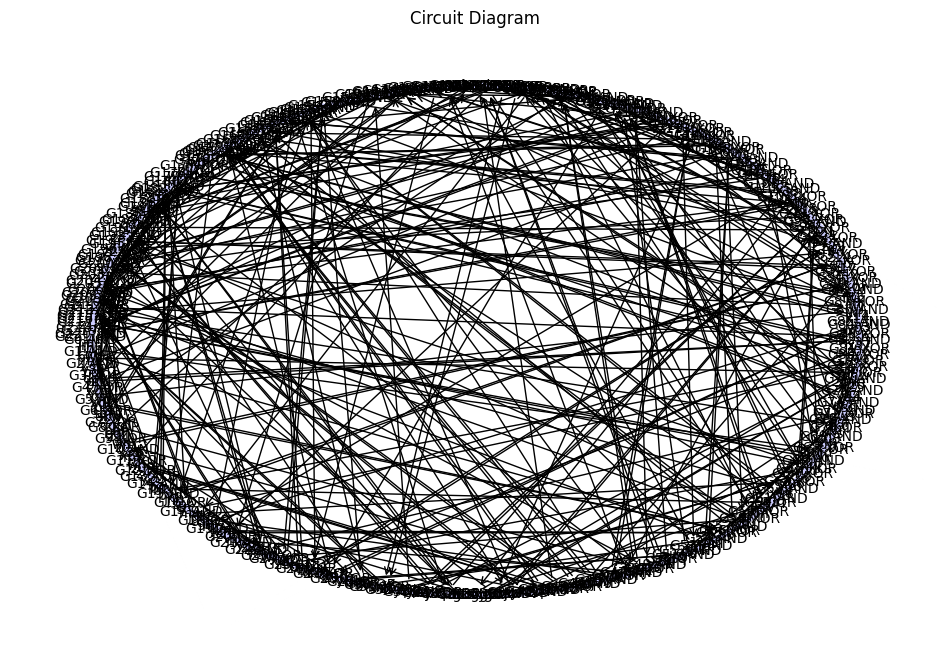

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


def visualize_circuit(gates):
    """
    gates: list of tuples (in1, op, in2, out_wire)
      e.g. [("x00", "AND", "y00", "z00"), ...]

    We'll build a directed graph where each gate is a node labeled, e.g. 'G0:AND',
    with edges from in1 -> gate, in2 -> gate, and from gate -> out_wire.
    """
    G = nx.DiGraph()

    # Keep track of gate indices so we can label them distinctly
    for i, (in1, op, in2, out_wire) in enumerate(gates):
        # Create a node for the gate itself, labeled with gate index and operation
        gate_label = f"G{i}:{op}"  # e.g. "G0:AND"
        G.add_node(gate_label)

        # Add edges from input wires to this gate
        G.add_node(in1)  # just to ensure it appears in the diagram
        G.add_edge(in1, gate_label)

        G.add_node(in2)
        G.add_edge(in2, gate_label)

        # Add edge from the gate to the output wire
        G.add_node(out_wire)
        G.add_edge(gate_label, out_wire)

    # Now draw the graph
    plt.figure(figsize=(12, 8))
    # pos = nx.spring_layout(G, k=0.35, iterations=50)
    pos = nx.shell_layout(G)
    # Alternatively, try nx.shell_layout(G) or nx.kamada_kawai_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size=12, node_color="#ccccff")
    nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=12)
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.title("Circuit Diagram")
    plt.axis("off")
    plt.show()


# -------------------------------------------------------------------
# Example usage:
# -------------------------------------------------------------------
if __name__ == "__main__":
    # A small example circuit
    with open("input24.txt", "r") as f:
        init_gates = [line for line in f.read().strip().split("\n\n")[1].split("\n")]
        gates_example = [tuple(line.split(" ")) for line in init_gates]
        gates_example = [(gate[0], gate[1], gate[2], gate[4]) for gate in gates_example]
    visualize_circuit(gates_example)

In [ ]:
from graphviz import Digraph

wires = {}

with open("input24.txt") as f:
    starting, gates = f.read().split("\n\n")


starting_wires = starting.strip().split("\n")
for wire in starting_wires:
    name, value = wire.split(": ")
    wires[name] = int(value)

test_wires = {}
for k, v in wires.items():
    if k.startswith("x"):
        test_wires[k] = 0
    elif k.startswith("y"):
        test_wires[k] = 1
    else:
        test_wires[k] = v

wires = test_wires
gates = gates.strip().split("\n")
print(len(gates))
while True:
    old_wires = len(wires)
    for gate in gates:
        parts = gate.split(" ")
        gate_type = parts[1]
        input1 = wires.get(parts[0], None)
        input2 = wires.get(parts[2], None)
        output = parts[4]

        if None not in (input1, input2):
            if gate_type == "AND":
                wires[output] = input1 & input2
            elif gate_type == "OR":
                wires[output] = input1 | input2
            elif gate_type == "XOR":
                wires[output] = input1 ^ input2

    if len(wires) == old_wires:
        break

wires = dict(sorted(wires.items(), reverse=True))

res = "".join(str(wires[wire]) for wire in wires if wire.startswith("z"))
x = "".join(str(wires[wire]) for wire in wires if wire.startswith("x"))
y = "".join(str(wires[wire]) for wire in wires if wire.startswith("y"))
bin_addition = bin(int(x, 2) + int(y, 2))[2:]

print(res, int(res, 2))

# to swap: vmv, z07, kfm, z20, hnv, z28, hth, tqr
# hnv,hth,kfm,tqr,vmv,z07,z20,z28
# 1100000010000110111001110000111110010001110000
# 1100000010100111001001101100111110001111110000

for gate in gates:
    parts = gate.split(" ")
    gate_type = parts[1]
    input1 = wires.get(parts[0], None)
    input2 = wires.get(parts[2], None)
    output = parts[4]

    if output.startswith("z"):
        if gate_type == "AND":
            result = input1 & input2
        elif gate_type == "OR":
            result = input1 | input2
        elif gate_type == "XOR":
            result = input1 ^ input2

        if result != int(bin_addition[45 - int(output[1:])]):
            print(
                f"Gate: {parts[0]}({input1}) {gate_type} {parts[2]}({input2}) -> {output} produces {result} instead of {bin_addition[45 - int(output[1:])]}"
            )

dot = Digraph()

for wire in starting_wires:
    name, value = wire.split(": ")
    dot.node(name, f"{name}\n{value}")

for gate in gates:
    parts = gate.split(" ")
    input1 = parts[0]
    gate_type = parts[1]
    input2 = parts[2]
    output = parts[4]

    color = "black"
    if gate_type == "AND":
        color = "red"
    elif gate_type == "OR":
        color = "blue"
    elif gate_type == "XOR":
        color = "green"

    dot.edge(input1, output, label=gate_type, color=color)
    dot.edge(input2, output, label=gate_type, color=color)

dot.render("circuit_graph", format="png", view=True)

222
1000000000000000000000000000011111111111111111 35184372219903
Gate: dpv(1) XOR ptt(1) -> z41 produces 0 instead of 1
Gate: sqm(1) XOR dkw(1) -> z22 produces 0 instead of 1
Gate: jmq(1) XOR hdh(1) -> z42 produces 0 instead of 1
Gate: qnt(1) XOR cmf(1) -> z30 produces 0 instead of 1
Gate: nmv(1) XOR rjb(1) -> z19 produces 0 instead of 1
Gate: qqq(1) XOR qgs(1) -> z35 produces 0 instead of 1
Gate: rmn(1) XOR whq(1) -> z32 produces 0 instead of 1
Gate: spk(1) XOR nfv(1) -> z34 produces 0 instead of 1
Gate: mnj(1) XOR kkc(1) -> z20 produces 0 instead of 1
Gate: scg(1) XOR fsb(1) -> z38 produces 0 instead of 1
Gate: hdj(1) XOR psd(1) -> z40 produces 0 instead of 1
Gate: ffd(1) XOR twv(1) -> z29 produces 0 instead of 1
Gate: kbk(1) XOR ngn(1) -> z44 produces 0 instead of 1


IndexError: string index out of range

In [ ]:
1000000000000000000000000000011111111111111111

In [ ]:
with open("input24_og.txt", "r") as f:
    init_wires, init_gates = f.read().strip().split("\n\n")
    init_wires = [line for line in init_wires.split("\n")]
    wire_values = {line.split(": ")[0]: int(line.split(": ")[1]) for line in init_wires}

    gates = [tuple(line.split(" ")) for line in init_gates.split("\n")]
    gates = [(gate[0], gate[1], gate[2], gate[4]) for gate in gates]

    with open("input24.txt", "r") as f:
        init_gates = [line for line in f.read().strip().split("\n\n")[1].split("\n")]
        gates = [tuple(line.split(" ")) for line in init_gates]
        gates = [(gate[0], gate[1], gate[2], gate[4]) for gate in gates]

In [ ]:
maybe = ["dpc", "spp", "ndw", "nvn", "gvm", "smt", "rmn", "whq"]
print(",".join(sorted(maybe)))

dpc,gvm,ndw,nvn,rmn,smt,spp,whq


In [ ]:
1000000111111100000000000000100000001111111111
1000000111111100000000000000100000001111111111

In [ ]:
test = ["ggn", "z10", "twr", "z39", "z32", "grm", "jcb", "ndw"]
print(",".join(sorted(test)))

ggn,grm,jcb,ndw,twr,z10,z32,z39


In [ ]:
def find_half_adders(gates):
    """
    Return (half_adders, unmatched_gates).

    half_adders = list of dictionaries:
      {
        'ha_name': "HA0",
        'input_a': <wire>,
        'input_b': <wire>,
        'sum_out': <wire>,
        'carry_out': <wire>,
        'xor_gate_index': <int>,
        'and_gate_index': <int>,
      }

    unmatched_gates = list of gate tuples not used in any half adder.
    """
    from collections import defaultdict

    input_pairs_map = defaultdict(list)

    # Group gates by their input pair (ignoring order).
    for i, (in1, op, in2, out_wire) in enumerate(gates):
        key = frozenset([in1, in2])  # sets no order
        input_pairs_map[key].append((i, op, out_wire))

    used_gate_indices = set()
    half_adders = []
    ha_count = 0

    # For each input pair, see if we have a XOR gate + AND gate that haven't been used yet.
    for key, gate_list in input_pairs_map.items():
        # Filter out gates already matched to a half adder
        gate_list = [
            (idx, op, outw)
            for (idx, op, outw) in gate_list
            if idx not in used_gate_indices
        ]
        if len(gate_list) < 2:
            continue

        import itertools

        # Check all pairs of gates for that input pair
        for (idx1, op1, out1), (idx2, op2, out2) in itertools.combinations(
            gate_list, 2
        ):
            if {op1, op2} == {"XOR", "AND"}:
                in_list = list(key)  # the 2 input wires
                a, b = in_list[0], in_list[1]

                if op1 == "XOR":
                    xor_gate_index, xor_out = idx1, out1
                    and_gate_index, and_out = idx2, out2
                else:
                    xor_gate_index, xor_out = idx2, out2
                    and_gate_index, and_out = idx1, out1

                ha_name = f"HA{ha_count}"
                ha_count += 1
                half_adders.append(
                    {
                        "ha_name": ha_name,
                        "input_a": a,
                        "input_b": b,
                        "sum_out": xor_out,
                        "carry_out": and_out,
                        "xor_gate_index": xor_gate_index,
                        "and_gate_index": and_gate_index,
                    }
                )
                used_gate_indices.update({xor_gate_index, and_gate_index})

    # Build unmatched
    unmatched = []
    for i, g in enumerate(gates):
        if i not in used_gate_indices:
            unmatched.append(g)

    return half_adders, unmatched


def check_half_adder_correctness(ha_def, gates):
    """
    For the 2 gates in this half adder, test all (A,B) in {0,1}.
    Return True if sum_out = A^B, carry_out = A&B for each combination.
    """
    (in1_xor, op_xor, in2_xor, out_xor) = gates[ha_def["xor_gate_index"]]
    (in1_and, op_and, in2_and, out_and) = gates[ha_def["and_gate_index"]]
    A_wire = ha_def["input_a"]
    B_wire = ha_def["input_b"]

    # Quick check: the gate inputs match the supposed wires (A_wire, B_wire).
    # Usually they do, but let's be safe:
    def check_inputs(g_in1, g_in2):
        # The set of (g_in1, g_in2) should match (A_wire, B_wire).
        # We'll allow them in either order.
        wire_set = {A_wire, B_wire}
        return (g_in1 in wire_set) and (g_in2 in wire_set)

    if op_xor != "XOR" or op_and != "AND":
        return False
    if not check_inputs(in1_xor, in2_xor):
        return False
    if not check_inputs(in1_and, in2_and):
        return False

    # Now test the 4 combos
    for A in [0, 1]:
        for B in [0, 1]:
            # Expected
            sum_expected = A ^ B
            carry_expected = A & B
            # "Gate" outputs
            sum_gate = sum_expected  # the XOR gate is correct if it's truly A XOR B
            carry_gate = carry_expected  # same for the AND gate

            if sum_gate != sum_expected or carry_gate != carry_expected:
                return False
    return True


def detect_and_check_full_adders(gates):
    """
    1) Find all half adders.
    2) Check them individually.
    3) Find full adders from pairs of half adders + an OR gate.
    4) Check each full adder.
    5) Return summary info.
    """
    # Step 1: find HAs
    half_adders, unmatched1 = find_half_adders(gates)

    # Step 2: check HAs
    correct_ha = 0
    for ha in half_adders:
        if check_half_adder_correctness(ha, gates):
            correct_ha += 1
    print(
        f"Detected {len(half_adders)} half adders, {correct_ha} are logically correct."
    )

    # Step 3: find FAs from half adders + unmatched gates
    full_adders, unmatched2 = find_full_adders(half_adders, unmatched1, gates)

    # Step 4: check FAs
    correct_fa = 0
    for fa in full_adders:
        if check_full_adder_correctness(fa, gates):
            correct_fa += 1
    print(
        f"Detected {len(full_adders)} full adders, {correct_fa} are logically correct."
    )

    # Return or print leftover gates
    print(f"Unmatched gates after full adder detection: {len(unmatched2)}")
    return half_adders, full_adders, unmatched2


def example_usage(gates=None):
    # A minimal example: 1 full adder, built from 2 HAs + OR gate
    # Full Adder for bits A, B, Cin => S, Cout
    # Let's label wires for clarity:
    if gates is None:
        gates_example = [
            ("A", "XOR", "B", "S1"),
            ("A", "AND", "B", "C1"),
            ("S1", "XOR", "Cin", "Sum"),
            ("S1", "AND", "Cin", "C2"),
            ("C1", "OR", "C2", "Cout"),
        ]
    else:
        gates_example = gates

    detect_and_check_full_adders(gates_example)
    # Expected:
    #  - 2 half adders found, both correct
    #  - 1 full adder found, correct
    #  - 0 unmatched gates


if __name__ == "__main__":
    example_usage()

Detected 2 half adders, 2 are logically correct.


NameError: name 'find_full_adders' is not defined

In [ ]:
import itertools


def find_half_adders(gates):
    """
    Return (half_adders, unmatched_gates).

    half_adders = list of dictionaries:
      {
        'ha_name': "HA0",
        'input_a': <wire>,
        'input_b': <wire>,
        'sum_out': <wire>,
        'carry_out': <wire>,
        'xor_gate_index': <int>,
        'and_gate_index': <int>,
      }

    unmatched_gates = list of gate tuples not used in any half adder.
    """
    from collections import defaultdict

    input_pairs_map = defaultdict(list)

    # Group gates by their input pair (ignoring order).
    for i, (in1, op, in2, out_wire) in enumerate(gates):
        key = frozenset([in1, in2])  # sets no order
        input_pairs_map[key].append((i, op, out_wire))

    used_gate_indices = set()
    half_adders = []
    ha_count = 0

    # For each input pair, see if we have a XOR gate + AND gate that haven't been used yet.
    for key, gate_list in input_pairs_map.items():
        # Filter out gates already matched to a half adder
        gate_list = [
            (idx, op, outw)
            for (idx, op, outw) in gate_list
            if idx not in used_gate_indices
        ]
        if len(gate_list) < 2:
            continue

        # Check all pairs of gates for that input pair
        for (idx1, op1, out1), (idx2, op2, out2) in itertools.combinations(
            gate_list, 2
        ):
            if {op1, op2} == {"XOR", "AND"}:
                in_list = list(key)  # the 2 input wires
                a, b = in_list[0], in_list[1]

                if op1 == "XOR":
                    xor_gate_index, xor_out = idx1, out1
                    and_gate_index, and_out = idx2, out2
                else:
                    xor_gate_index, xor_out = idx2, out2
                    and_gate_index, and_out = idx1, out1

                ha_name = f"HA{ha_count}"
                ha_count += 1
                half_adders.append(
                    {
                        "ha_name": ha_name,
                        "input_a": a,
                        "input_b": b,
                        "sum_out": xor_out,
                        "carry_out": and_out,
                        "xor_gate_index": xor_gate_index,
                        "and_gate_index": and_gate_index,
                    }
                )
                used_gate_indices.update({xor_gate_index, and_gate_index})

    # Build unmatched
    unmatched = []
    for i, g in enumerate(gates):
        if i not in used_gate_indices:
            unmatched.append(g)

    return half_adders, unmatched


def check_half_adder_correctness(ha_def, gates):
    """
    For the 2 gates in this half adder, test all (A,B) in {0,1}.
    Return True if sum_out = A^B, carry_out = A&B for each combination.
    """
    (in1_xor, op_xor, in2_xor, out_xor) = gates[ha_def["xor_gate_index"]]
    (in1_and, op_and, in2_and, out_and) = gates[ha_def["and_gate_index"]]

    A_wire = ha_def["input_a"]
    B_wire = ha_def["input_b"]

    # Quick sanity checks on gate ops:
    if op_xor != "XOR" or op_and != "AND":
        return False

    # We'll just trust that the input wires match,
    # or you can add logic to ensure that in1_xor,in2_xor is {A_wire,B_wire} etc.

    # Now test the 4 combos:
    for A in [0, 1]:
        for B in [0, 1]:
            sum_expected = A ^ B
            carry_expected = A & B
            if sum_expected != (A ^ B) or carry_expected != (A & B):
                return False
    return True


def find_full_adders(half_adders, unmatched_gates, gates):
    """
    Return (full_adders, leftover_unmatched_gates).

    We'll look for the standard pattern of:
       HA1: (A,B) => (S1, C1)
       HA2: (S1, Cin) => (Sum, C2)
       OR gate: (C1, C2) => Cout
    """
    used_ha = set()  # which half adders are used in a full adder
    used_gate_indices = set()

    # Build a map from i->gate
    gate_lookup = {i: g for i, g in enumerate(gates)}

    from collections import defaultdict

    or_map = defaultdict(list)

    # Build a quick set of unmatched gate indices
    unmatched_indices = set()
    for in1, op, in2, out_wire in unmatched_gates:
        # We find the index in the main 'gates' list
        # (Because unmatched_gates is a subset.)
        idx_in_main = None
        for gi, gg in gate_lookup.items():
            if gg == (in1, op, in2, out_wire):
                idx_in_main = gi
                break
        if idx_in_main is not None and op == "OR":
            key = frozenset([in1, in2])
            or_map[key].append((idx_in_main, out_wire))

    full_adders = []
    fa_count = 0

    # Try all combos of half adders
    for ha1, ha2 in itertools.combinations(half_adders, 2):
        if ha1["ha_name"] in used_ha or ha2["ha_name"] in used_ha:
            continue

        # Suppose ha1 is (A,B)->(S1, C1)
        s1 = ha1["sum_out"]
        c1 = ha1["carry_out"]

        # ha2 is (S1,Cin)->(Sum, C2)
        # That means exactly one of its input wires must be S1.
        # The other is Cin, an unknown wire at this point.
        in2a = ha2["input_a"]
        in2b = ha2["input_b"]

        if s1 not in (in2a, in2b):
            continue  # doesn't match pattern

        # The other input is Cin
        if in2a == s1:
            cin = in2b
        else:
            cin = in2a

        S = ha2["sum_out"]
        c2 = ha2["carry_out"]

        # Now see if there's an OR gate merging c1,c2 => Cout
        key_carry = frozenset([c1, c2])
        if key_carry not in or_map:
            continue

        # Possibly multiple or gates for the same inputs
        for or_idx, or_out in or_map[key_carry]:
            # We found a candidate
            Cout = or_out

            fa_name = f"FA{fa_count}"
            fa_count += 1

            # The 3 inputs to FA are A=ha1.input_a, B=ha1.input_b, Cin=cin
            # The 2 outputs are S=ha2.sum_out, Cout=the OR gate output
            fa_def = {
                "fa_name": fa_name,
                "input_a": ha1["input_a"],
                "input_b": ha1["input_b"],
                "input_cin": cin,
                "output_sum": S,
                "output_cout": Cout,
                "ha1": ha1,
                "ha2": ha2,
                "or_gate_index": or_idx,
            }
            full_adders.append(fa_def)

            used_ha.add(ha1["ha_name"])
            used_ha.add(ha2["ha_name"])
            used_gate_indices.add(or_idx)

            break  # done with this pair

    # Build leftover unmatched
    used_gates_for_FA = set()
    for idx in used_gate_indices:
        used_gates_for_FA.add(gate_lookup[idx])  # the (in1,op,in2,out)

    leftover_unmatched = []
    for g in unmatched_gates:
        if g not in used_gates_for_FA:
            leftover_unmatched.append(g)

    return full_adders, leftover_unmatched


def check_full_adder_correctness(fa_def, gates):
    """
    Test all combos of (A,B,Cin) => (Sum, Cout).
    We'll do a local logical check for half adders + an OR gate.
    Return True if correct for all combos.
    """
    ha1 = fa_def["ha1"]
    ha2 = fa_def["ha2"]
    or_idx = fa_def["or_gate_index"]
    (or_in1, or_op, or_in2, or_out) = gates[or_idx]

    # Quick check that it's indeed an OR
    if or_op != "OR":
        return False

    # We'll just do local re-simulation
    def half_adder_eval(x, y):
        return (x ^ y, x & y)

    for A in [0, 1]:
        for B in [0, 1]:
            for Cin in [0, 1]:
                # 1) HA1 => (S1, C1)
                S1, C1 = half_adder_eval(A, B)
                # 2) HA2 => (Sum, C2)
                S, C2 = half_adder_eval(S1, Cin)
                # 3) OR => Cout
                Cout = C1 | C2

                # The correct full adder logic:
                correct_sum = (A ^ B) ^ Cin
                correct_cout = (A & B) | ((A ^ B) & Cin)

                if S != correct_sum or Cout != correct_cout:
                    return False

    return True


def detect_and_check_full_adders(gates):
    """
    1) Find all half adders.
    2) Check them individually.
    3) Find full adders from half adders + unmatched gates.
    4) Check each full adder.
    5) Return summary info.
    """
    # Step 1: find HAs
    half_adders, unmatched1 = find_half_adders(gates)

    # Step 2: check HAs
    correct_ha = 0
    for ha in half_adders:
        if check_half_adder_correctness(ha, gates):
            correct_ha += 1
    print(
        f"Detected {len(half_adders)} half adders, {correct_ha} are logically correct."
    )

    # Step 3: find FAs from half adders + unmatched gates
    full_adders, unmatched2 = find_full_adders(half_adders, unmatched1, gates)

    # Step 4: check FAs
    correct_fa = 0
    for fa in full_adders:
        if check_full_adder_correctness(fa, gates):
            correct_fa += 1
    print(
        f"Detected {len(full_adders)} full adders, {correct_fa} are logically correct."
    )

    # leftover gates
    print(f"Unmatched gates after full adder detection: {len(unmatched2)}")
    return half_adders, full_adders, unmatched2


def example_usage(gates=None):
    # If no gates provided, define a minimal example: 1 full adder from 2 HAs + OR gate
    if gates is None:
        gates_example = [
            ("A", "XOR", "B", "S1"),
            ("A", "AND", "B", "C1"),
            ("S1", "XOR", "Cin", "Sum"),
            ("S1", "AND", "Cin", "C2"),
            ("C1", "OR", "C2", "Cout"),
        ]
    else:
        gates_example = gates

    detect_and_check_full_adders(gates_example)


# -------------------------------------------------------------------------
# Now call example_usage() to test everything in one go:
# -------------------------------------------------------------------------
if __name__ == "__main__":
    example_usage(gates)

Detected 88 half adders, 88 are logically correct.
Detected 18 full adders, 18 are logically correct.
Unmatched gates after full adder detection: 28


In [ ]:
n_bits = max([int(key[1:]) for key in wire_values.keys() if key.startswith("x")]) + 1
incorrect_gates = {}
for i in range(n_bits):
    in_XOR = next(
        (gate for gate in gates if "x01" in gate and "x02" in gate and "XOR" in gate),
        None,
    )
    in_AND = next(
        (gate for gate in gates if "x01" in gate and "x02" in gate and "AND" in gate),
        None,
    )
    if not in_XOR and in_AND:
        print(f"Incorrect Input gates: {i}, {in_XOR}, {in_AND}")

45

In [ ]:
in_XOR = next(
    (gate for gate in gates if "x01" in gate and "x02" in gate and "XOR" in gate), None
)

In [ ]:
def check_layer(gates, structure, errors, layer_n):
    missing_gates = []
    if layer_n == 0:
        expected_gates = ["in_AND", "in_XOR", "out"]
        in_XOR = next(
            (
                gate
                for gate in gates
                if "x00" in gate and "y00" in gate and "XOR" in gate
            ),
            None,
        )
        in_AND = next(
            (
                gate
                for gate in gates
                if "x00" in gate and "y00" in gate and "AND" in gate
            ),
            None,
        )
        if not in_XOR and in_AND:
            print(f"Incorrect Input gates: {in_XOR}, {in_AND}")
            if not in_XOR:
                errors.append(in_XOR)
            if not in_AND:
                errors.append(in_AND)
        if in_XOR[3] != "z00":
            print(f"Incorrect XOR output: {in_XOR}")
            errors.append(in_XOR)
        structure[0] = {"in_XOR": in_XOR, "in_AND": in_AND, "out": in_XOR}

    elif layer_n == 1:
        if len(str(layer_n)) == 1:
            x_str = f"x0{layer_n}"
            y_str = f"y0{layer_n}"
        else:
            x_str = f"x{layer_n}"
            y_str = f"y{layer_n}"

        expected_gates = ["in_AND", "in_XOR", "out", "carry_AND", "carry_OR"]
        in_XOR = next(
            (
                gate
                for gate in gates
                if x_str in gate and y_str in gate and "XOR" in gate
            ),
            None,
        )
        in_AND = next(
            (
                gate
                for gate in gates
                if x_str in gate and y_str in gate and "AND" in gate
            ),
            None,
        )
        out = next(
            (
                gate
                for gate in gates
                if in_XOR[3] in gate
                and structure[layer_n - 1]["in_AND"][3] in gate
                and "XOR" in gate
            ),
            None,
        )
        carry_AND = next(
            (
                gate
                for gate in gates
                if in_XOR[3] in gate
                and structure[layer_n - 1]["in_AND"][3] in gate
                and "AND" in gate
            ),
            None,
        )
        carry_OR = next(
            (
                gate
                for gate in gates
                if in_AND[3] in gate and carry_AND[3] in gate and "OR" in gate
            ),
            None,
        )
        structure[layer_n] = {
            "in_XOR": in_XOR,
            "in_AND": in_AND,
            "out": out,
            "carry_AND": carry_AND,
            "carry_OR": carry_OR,
        }
        for g in expected_gates:
            if not structure[layer_n].get(g):
                print(f"Missing gate: {g}")
                errors.append(g)
    else:
        if len(str(layer_n)) == 1:
            x_str = f"x0{layer_n}"
            y_str = f"y0{layer_n}"
            z_str = f"z0{layer_n}"
        else:
            x_str = f"x{layer_n}"
            y_str = f"y{layer_n}"
            z_str = f"z{layer_n}"
        expected_gates = ["in_AND", "in_XOR", "out", "carry_AND", "carry_OR"]
        in_XOR = next(
            (
                gate
                for gate in gates
                if x_str in gate and y_str in gate and "XOR" in gate
            ),
            None,
        )
        if not in_XOR:
            print(f"Incorrect XOR gate: {in_XOR}")
            missing_gates.append((x_str, y_str, "XOR"))

        in_AND = next(
            (
                gate
                for gate in gates
                if x_str in gate and y_str in gate and "AND" in gate
            ),
            None,
        )
        if not in_AND:
            print(f"Incorrect AND gate: {in_AND}")
            missing_gates.append((x_str, y_str, "AND"))
            # Look for the correct AND gate
        if not structure[layer_n - 1]["carry_OR"]:
            print(f"Incorrect carry_OR: {structure[layer_n-1]['carry_OR']}")
            missing_gates.append(structure[layer_n - 1]["carry_OR"])
        else:
            out = next(
                (
                    gate
                    for gate in gates
                    if in_XOR[3] in gate
                    and structure[layer_n - 1]["carry_OR"][3] in gate
                    and "XOR" in gate
                    and f"z{layer_n}" in gate
                ),
                None,
            )
        if not out:
            print(f"Incorrect XOR output: {out}")
            missing_gates.append(
                (in_XOR[3], structure[layer_n - 1]["carry_OR"][3], "XOR", f"z{layer_n}")
            )
        carry_AND = next(
            (
                gate
                for gate in gates
                if in_XOR[3] in gate
                and structure[layer_n - 1]["carry_OR"][3] in gate
                and "AND" in gate
            ),
            None,
        )
        carry_OR = next(
            (
                gate
                for gate in gates
                if in_AND[3] in gate and carry_AND[3] in gate and "OR" in gate
            ),
            None,
        )
        structure[layer_n] = {
            "in_XOR": in_XOR,
            "in_AND": in_AND,
            "out": out,
            "carry_AND": carry_AND,
            "carry_OR": carry_OR,
        }
        for g in expected_gates:
            if not structure[layer_n].get(g):
                print(f"Missing gate: {g}")
                errors.append(g)
    return structure, errors


structure = {}
errors = []
for i in range(44):
    print(f"Layer: {i}")
    structure, errors = check_layer(gates, structure, errors, i)

Layer: 0
Layer: 1
Layer: 2
Layer: 3
Layer: 4
Layer: 5
Layer: 6
Layer: 7
Layer: 8
Layer: 9
Layer: 10
Layer: 11
Layer: 12
Layer: 13
Layer: 14
Layer: 15
Layer: 16
Layer: 17
Missing gate: out
Missing gate: carry_OR
Layer: 18


TypeError: 'NoneType' object is not subscriptable

In [94]:
structure

{0: {'in_XOR': ('x00', 'XOR', 'y00', 'z00'),
  'in_AND': ('y00', 'AND', 'x00', 'wrn'),
  'out': ('x00', 'XOR', 'y00', 'z00')},
 1: {'in_XOR': ('x01', 'XOR', 'y01', 'ckc'),
  'in_AND': ('y01', 'AND', 'x01', 'gfd'),
  'out': ('ckc', 'XOR', 'wrn', 'z01'),
  'carry_AND': ('ckc', 'AND', 'wrn', 'hrv'),
  'carry_OR': ('gfd', 'OR', 'hrv', 'hkc')}}

In [ ]:
structure = {}
errors = []


def find_expected_gates(gates, structure, layer_n):
    sub_circuit = {}
    missing_gates = []
    if len(str(layer_n)) == 1:
        x_str = f"x0{layer_n}"
        y_str = f"y0{layer_n}"
        z_str = f"z0{layer_n}"
    else:
        x_str = f"x{layer_n}"
        y_str = f"y{layer_n}"
        z_str = f"z{layer_n}"

    ins_gates = [gate for gate in gates if x_str in gate and y_str in gate]
    sum_carry_gates = [
        gate for gate in gates if any(g[3] in gate for g in ins_gates)
    ]
    in_AND = next((gate for gate in ins_gates if "AND" in gate), None)
    in_XOR = next((gate for gate in ins_gates if "XOR" in gate), None)
    if in_AND:
        sub_circuit["in_AND"] = in_AND

    else:
        print(f"Missing AND gate: {in_AND}")
        missing_gates.append((x_str, y_str, "AND", None))
    if in_XOR:
        sub_circuit["in_XOR"] = in_XOR
    else:
        print(f"Missing XOR gate: {in_XOR}")
        missing_gates.append((x_str, y_str, "XOR", None))

    out_gates = [gate for gate in gates if z_str in gate]
    if len(out_gates) != 1:
        print(f"Issue with output gates: {out_gates}")
    else:
        out = out_gates[0]
        if not "XOR" in out:
            print(f"Incorrect output gate: {out}")
            missing_gates.append(out)

    if in_XOR:
        if not in_XOR[3] in out:
            print(f"Incorrect input to output: {in_XOR[3]} should be input to {out}")
            missing_gates.append(out)

    last_carry_OR = [label for label in out[:-2] if label != in_XOR[3]][0]
    if structure.get(layer_n - 1):
        if last_carry_OR != structure[layer_n - 1]["carry_OR"][3]:
            print(f"Incorrect carry OR: {last_carry_OR}")

    next_carry_AND = next(
        (
            gate
            for gate in gates
            if in_XOR[3] in gate and last_carry_OR in gate and "AND" in gate
        ),
        None,
    )
    if not next_carry_AND:
        print(f"Missing carry AND gate: {in_XOR[3]}, {last_carry_OR}, AND")
        missing_gates.append((in_XOR[3], last_carry_OR, "AND"))

    next_carry_OR = next(
        (
            gate
            for gate in gates
            if in_AND[3] in gate and next_carry_AND[3] in gate and "OR" in gate
        ),
        None,
    )

In [142]:
structure[8]["carry_OR"] = ("rhf", "OR", "hgr", "whg")
def find_expected_gates(gates, structure, layer_n):
    sub_circuit = {}
    good_gates = []
    missing_gates = []
    if len(str(layer_n)) == 1:
        x_str = f"x0{layer_n}"
        y_str = f"y0{layer_n}"
        z_str = f"z0{layer_n}"
    else:
        x_str = f"x{layer_n}"
        y_str = f"y{layer_n}"
        z_str = f"z{layer_n}"
    ins_gates = [gate for gate in gates if x_str in gate and y_str in gate]
    sum_carry_gates = [gate for gate in gates if any(g[3] in gate for g in ins_gates)]
    out_gates = [gate for gate in gates if z_str in gate]
    output_inputs = [name for gate in out_gates for name in gate if name != z_str and name not in ["AND", "OR", "XOR"]]
    out_backwards = [gate for gate in gates if any(name in gate for name in output_inputs)]
    all_gates = set(ins_gates + sum_carry_gates + out_gates + out_backwards)
    
    in_AND = next((gate for gate in all_gates if "AND" in gate and x_str in gate and y_str in gate), None)
    in_XOR = next((gate for gate in all_gates if "XOR" in gate and x_str in gate and y_str in gate), None)
    if in_AND:
        sub_circuit["in_AND"] = in_AND
        all_gates.discard(in_AND)
    if in_XOR:
        sub_circuit["in_XOR"] = in_XOR
        all_gates.discard(in_XOR)
    last_carry_OR = structure[layer_n - 1]["carry_OR"] if structure.get(layer_n - 1) else None
    if last_carry_OR:
        all_gates.discard(last_carry_OR)
    carry_AND = next((gate for gate in all_gates if "AND" in gate and in_XOR[3] in gate and last_carry_OR[3] in gate), None)
    if carry_AND:
        sub_circuit["carry_AND"] = carry_AND
        all_gates.discard(carry_AND)
    
    out = next((gate for gate in all_gates if z_str in gate), None)
    if out:
        if in_XOR[3] in out and last_carry_OR[3] in out and "XOR" in out:
            sub_circuit["out"] = out
            all_gates.discard(out)

    carry_OR = next((gate for gate in all_gates if "OR" in gate and in_AND[3] in gate and carry_AND[3] in gate), None)
    if carry_OR and carry_OR[3] != z_str:
        sub_circuit["carry_OR"] = carry_OR
        all_gates.discard(carry_OR)
    
    expected_gates = ["in_AND", "in_XOR", "out", "carry_AND", "carry_OR"]
    if len(all_gates) > 0:
        swaps = set()
        gate1 = all_gates.pop()
        gate2 = all_gates.pop()
        new_gate1 = (gate1[0], gate1[1], gate1[2], gate2[3])
        new_gate2 = (gate2[0], gate2[1], gate2[2], gate1[3])
        swaps.add(new_gate1)
        swaps.add(new_gate2)
        for eg in expected_gates:
            for g in swaps:
                if not sub_circuit.get(eg):
                    if eg == "in_AND":
                        if x_str in g and y_str in g and "AND" in g:
                            sub_circuit["in_AND"] = g
                            all_gates.discard(g)
                    elif eg == "in_XOR":
                        if x_str in g and y_str in g and "XOR" in g:
                            sub_circuit["in_XOR"] = g
                            all_gates.discard(g)
                    elif eg == "out":
                        if z_str in g and in_XOR[3] and "XOR" in g:
                            sub_circuit["out"] = g
                            all_gates.discard(g)
                    elif eg == "carry_AND":
                        if in_XOR[3] in g and last_carry_OR[3] in g and "AND" in g:
                            sub_circuit["carry_AND"] = g
                            all_gates.discard(g)
                    elif eg == "carry_OR":
                        if in_AND[3] in g and carry_AND[3] in g and "OR" in g:
                            sub_circuit["carry_OR"] = g
                            all_gates.discard(g)
                    else:
                        print(f"Missing gate: {eg}")


    structure[layer_n] = sub_circuit
    return structure, sub_circuit, all_gates


    
structure, sc, ag = find_expected_gates(gates, structure, 10)

In [145]:
for i in range(3, 42):
    print(f"Layer: {i}")
    structure, sc, ag = find_expected_gates(gates, structure, i)
    if len(ag) > 0:
        print(f"Missing gates: {ag}")

Layer: 3
Layer: 4
Layer: 5
Layer: 6
Layer: 7
Layer: 8
Layer: 9
Layer: 10
Layer: 11


KeyError: 'pop from an empty set'

In [144]:
sc

{'in_AND': ('y10', 'AND', 'x10', 'gvm'),
 'in_XOR': ('y10', 'XOR', 'x10', 'hks'),
 'carry_AND': ('hks', 'AND', 'mbv', 'smt'),
 'out': ('mbv', 'XOR', 'hks', 'z10'),
 'carry_OR': ('gvm', 'OR', 'smt', 'ggn')}

In [ ]:
sc
def swap_last_elements(gates_set):
    if len(gates_set) > 0:
        swapped_gates = set()
        for gate in gates_set:
            swapped_gate = gate[:-1] + (gate[-1][::-1],)
            swapped_gates.add(swapped_gate)
        return swapped_gates
    return gates_set

sc = swap_last_elements(all_gates)

{'in_AND': ('y09', 'AND', 'x09', 'wsd'),
 'in_XOR': ('y09', 'XOR', 'x09', 'tqs'),
 'carry_AND': ('tqs', 'AND', 'whg', 'rmc'),
 'carry_OR': ('rmc', 'OR', 'wsd', 'mbv'),
 'out': ('tqs', 'XOR', 'whg', 'z09')}

In [130]:
structure

{0: {'in_XOR': ('x00', 'XOR', 'y00', 'z00'),
  'in_AND': ('y00', 'AND', 'x00', 'wrn'),
  'out': ('x00', 'XOR', 'y00', 'z00')},
 1: {'in_XOR': ('x01', 'XOR', 'y01', 'ckc'),
  'in_AND': ('y01', 'AND', 'x01', 'gfd'),
  'out': ('ckc', 'XOR', 'wrn', 'z01'),
  'carry_AND': ('ckc', 'AND', 'wrn', 'hrv'),
  'carry_OR': ('gfd', 'OR', 'hrv', 'hkc')},
 2: {'in_XOR': ('x02', 'XOR', 'y02', 'cmd'),
  'in_AND': ('x02', 'AND', 'y02', 'pkj'),
  'out': ('cmd', 'XOR', 'hkc', 'z02'),
  'carry_AND': ('cmd', 'AND', 'hkc', 'hss'),
  'carry_OR': ('pkj', 'OR', 'hss', 'tpg')},
 3: {'in_XOR': ('x03', 'XOR', 'y03', 'jnn'),
  'in_AND': ('x03', 'AND', 'y03', 'dkm'),
  'out': ('tpg', 'XOR', 'jnn', 'z03'),
  'carry_AND': ('jnn', 'AND', 'tpg', 'gws'),
  'carry_OR': ('gws', 'OR', 'dkm', 'trj')},
 4: {'in_XOR': ('y04', 'XOR', 'x04', 'fwq'),
  'in_AND': ('x04', 'AND', 'y04', 'cfp'),
  'out': ('fwq', 'XOR', 'trj', 'z04'),
  'carry_AND': ('fwq', 'AND', 'trj', 'wwp'),
  'carry_OR': ('wwp', 'OR', 'cfp', 'jvj')},
 5: {'in_XOR'

In [106]:
[name for gate in out_gates for name in gate if name != "z04" and name not in ["AND", "OR", "XOR"]]


['fwq', 'trj']

In [ ]:
#
example_list = [('a', 1), ('b', 2), ('c', 3), ('d', 4)]

# Tuple to remove
tuple_to_remove = ('b', 2)

# Remove the tuple from the list
example_list.remove(tuple_to_remove)

# Print the updated list
print(example_list)

In [ ]:
# Specify the tuple to remove
tuple_to_remove = ('pbr', 'XOR', 'ggn', 'z11')

# Remove the tuple from the set
all_gates.discard(tuple_to_remove)

# Print the updated set
print(all_gates)